# 可以挑选出特定的zipcode观察房价指数在9年内的变化

rental_data.csv是租房数据
home_price_data.csv是售房数据
result_data.csv是经过处理的租售比数据

Code Snippet 1：可以替换自己想看的zipcode 观察9年内的房价指数变化

Code Snippet 2 ：通过租售比年增长率作为指标升序排列出top-n的zipcode


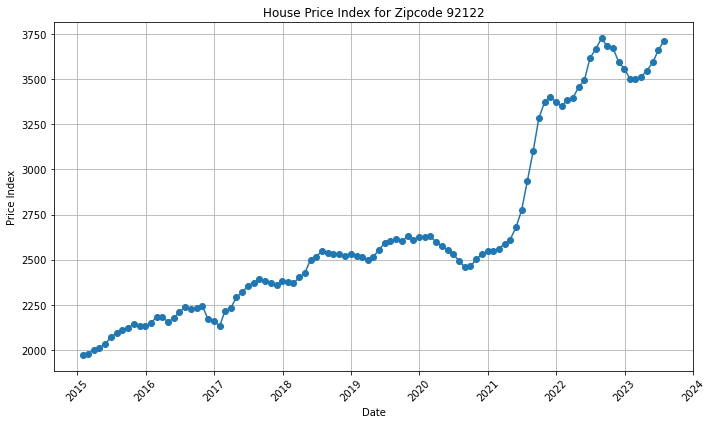

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('data/rental_data.csv')  # 替换为您的CSV文件路径

zipcode_you_want = 92122 
# 选择特定的zipcode数据
zipcode_data = data[data['RegionName'] == zipcode_you_want]

# 获取日期列
date_columns = data.columns[9:]  # 假设房价指数数据从第10列开始

# 提取房价指数数据
price_index = zipcode_data[date_columns].values.flatten()

# 创建日期范围
dates = pd.to_datetime(date_columns)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(dates, price_index, marker='o')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title(f'House Price Index for Zipcode {zipcode_you_want}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


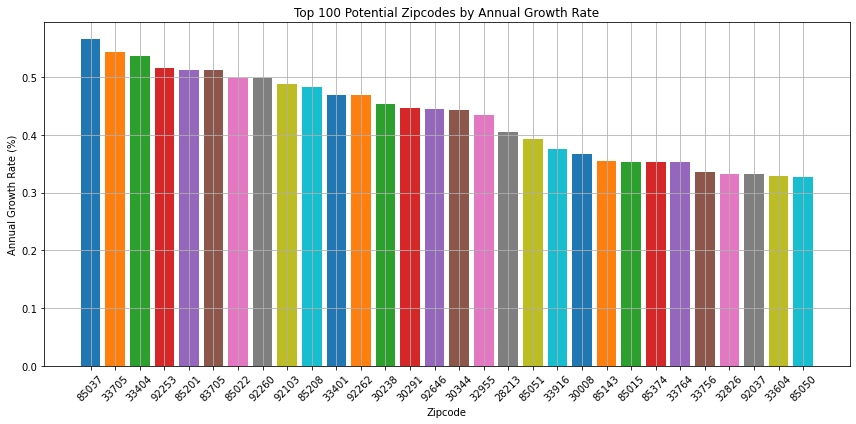

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('result_data.csv')  

date_columns = data.columns[9:]  # 因为房价指数从第9列开始

data['AnnualGrowthRate'] = data[date_columns].apply(lambda row: (row[-1] / row[0])**(1/len(date_columns)) - 1, axis=1)

sorted_data = data.sort_values(by='AnnualGrowthRate', ascending=False)

top_100_zipcodes = sorted_data['RegionName'].head(30).tolist()



plt.figure(figsize=(12, 6))
for zipcode in top_100_zipcodes:
    zipcode_data = data[data['RegionName'] == zipcode]
    annual_growth_rate = zipcode_data['AnnualGrowthRate'].values[0] * 100  # 转换为百分比
    plt.bar(str(zipcode), annual_growth_rate)
plt.xlabel('Zipcode')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Top 100 Potential Zipcodes by Annual Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


import pandas as pd

# 定义函数，接收文件路径和要搜索的数字列表
def search_numbers_in_file(file_path, search_numbers):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    # 修改打印设置，使其不换行
    pd.set_option('display.expand_frame_repr', False)
    
    # 在循环中逐个搜索数字并分别打印匹配的行
    for number in search_numbers:
        matching_rows = df[df.iloc[:, 0] == number]
        if not matching_rows.empty:
            print(f"Matching rows for number {number} in {file_path}:\n{matching_rows}\n")

# 要搜索的数字列表
search_numbers = [85037]  # 可根据需要添加更多数字

# 在循环中逐个搜索数字并分别输出两个文件的匹配行
for number in search_numbers:
    print(f"Searching for number: {number}")
    search_numbers_in_file('/Users/Alan/Desktop/PricePrediction/raw-data/raw-house-price-data.csv', [number])
    search_numbers_in_file('/Users/Alan/Desktop/PricePrediction/raw-data/raw-rental-data.csv', [number])
    print("=" * 40)  # 分隔不同数字的输出



   

新版本年增长率


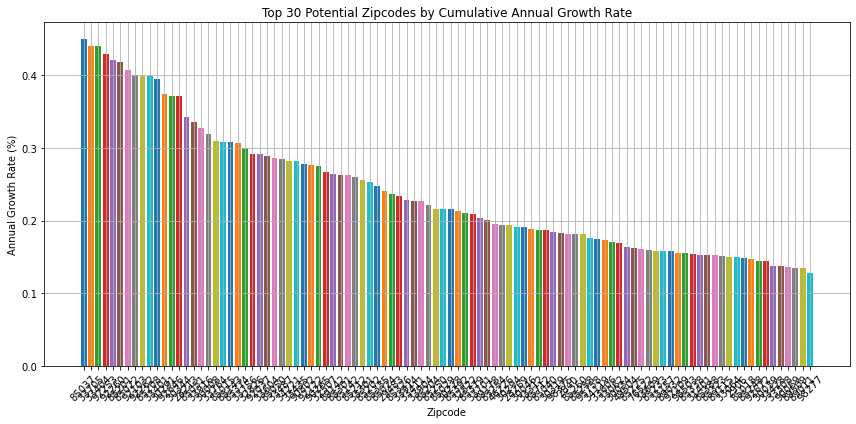

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/result_data.csv')

date_columns = data.columns[9:]  # 因为房价指数从第9列开始

# 计算年增长率并将其添加到DataFrame中
annual_growth_rates = []
for index, row in data.iterrows():
    growth_rates = []
    for i in range(len(date_columns) - 1):
        growth_rate = (row[date_columns[i + 1]] / row[date_columns[i]]) - 1
        growth_rates.append(growth_rate)
    annual_growth_rate = (1 + sum(growth_rates)) ** (1 / len(date_columns)) - 1
    annual_growth_rates.append(annual_growth_rate)

data['AnnualGrowthRate'] = annual_growth_rates

sorted_data = data.sort_values(by='AnnualGrowthRate', ascending=False)

top_100_zipcodes = sorted_data['RegionName'].head(100).tolist()

plt.figure(figsize=(12, 6))
for zipcode in top_100_zipcodes:
    zipcode_data = data[data['RegionName'] == zipcode]
    annual_growth_rate = zipcode_data['AnnualGrowthRate'].values[0] * 100  # 转换为百分比
    plt.bar(str(zipcode), annual_growth_rate)
plt.xlabel('Zipcode')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Top 30 Potential Zipcodes by Cumulative Annual Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


平均值


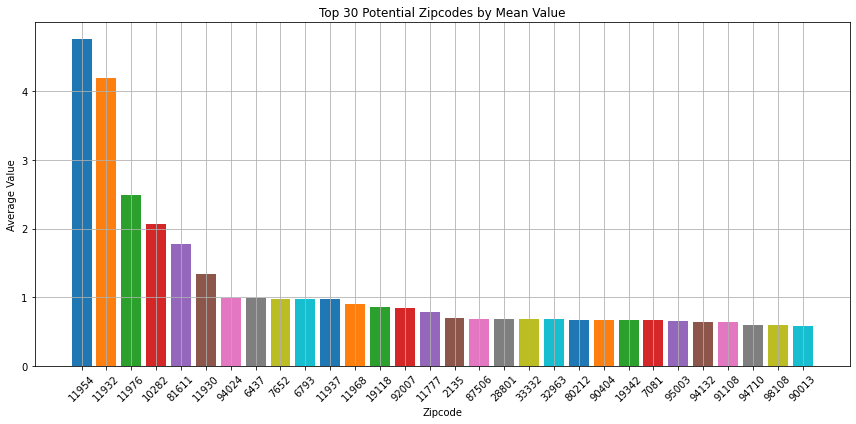

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/new-result.csv')

date_columns = data.columns[9:]  # 因为房价指数从第9列开始

# 计算每个地区的平均值
data['MeanValue'] = data[date_columns].mean(axis=1)

sorted_data = data.sort_values(by='MeanValue', ascending=False)

top_100_zipcodes = sorted_data['RegionName'].head(30).tolist()

plt.figure(figsize=(12, 6))
for zipcode in top_100_zipcodes:
    zipcode_data = data[data['RegionName'] == zipcode]
    mean_value = zipcode_data['MeanValue'].values[0]
    plt.bar(str(zipcode), mean_value)
plt.xlabel('Zipcode')
plt.ylabel('Average Value')
plt.title('Top 30 Potential Zipcodes by Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


中位数


[6793, 48205, 48234, 43605, 21223, 21217, 19132, 39209, 64120, 48204, 48203, 19133, 44108, 48238, 62206, 61603, 63115, 45402, 48227, 21216, 48228, 63136, 71109, 43607, 30901, 35211, 43609, 11968, 8102, 31903]


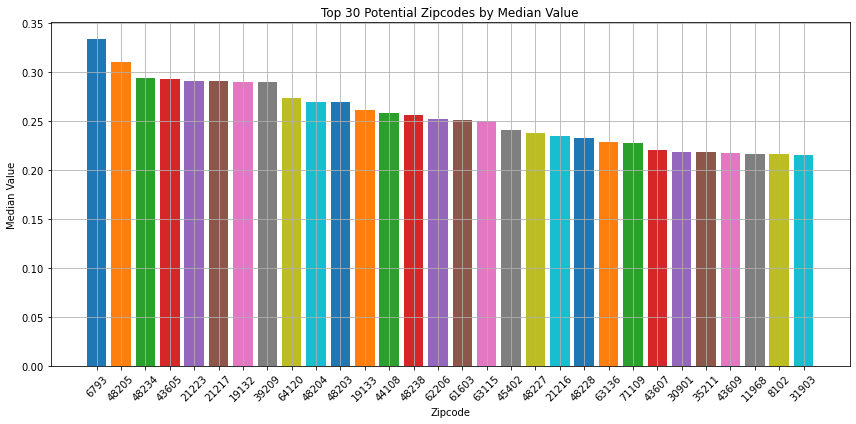

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./new—result.csv')

date_columns = data.columns[9:]  # 因为房价指数从第9列开始

# 计算每个地区的中位数
data['MedianValue'] = data[date_columns].median(axis=1)

sorted_data = data.sort_values(by='MedianValue', ascending=False)

top_100_zipcodes = sorted_data['RegionName'].head(30).tolist()

# 将top 30 zipcodes输出成一个列表
top_30_zipcodes_list = top_100_zipcodes
print(top_30_zipcodes_list)

plt.figure(figsize=(12, 6))
for zipcode in top_100_zipcodes:
    zipcode_data = data[data['RegionName'] == zipcode]
    median_value = zipcode_data['MedianValue'].values[0]
    plt.bar(str(zipcode), median_value)
plt.xlabel('Zipcode')
plt.ylabel('Median Value')
plt.title('Top 30 Potential Zipcodes by Median Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



In [10]:
import pandas as pd

# 读取原始的CSV文件
original_data = pd.read_csv('/Users/Alan/Desktop/PricePrediction/new—result.csv')

# 选择需要逆序的列，假设这些列是第10列开始到最后一列
columns_to_reverse = original_data.columns[9:]  # 注意列索引从0开始，这里选择第10列开始

# 定义一个函数，用于逆序时间序列列
def reverse_time_series(series):
    # 尝试将列中的值转换为日期时间格式，如果失败，则保留原始值
    try:
        date_series = pd.to_datetime(series, format='%Y-%m-%d')
        return date_series.sort_values(ascending=False).dt.strftime('%Y-%m-%d')
    except ValueError:
        return series

# 逆序选定的列
original_data[columns_to_reverse] = original_data[columns_to_reverse].apply(reverse_time_series)

# 将结果保存回原始的CSV文件
original_data.to_csv('/Users/Alan/Desktop/PricePrediction/new—result.csv', index=False)


In [57]:
import pandas as pd
import os

# 定义文件路径
file1 = './new—result.csv'
file2 = './raw-data/raw-rental-data.csv'
file3 = './raw-data/raw-house-price-data.csv'

# 读取三个数据文件
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)
data3 = pd.read_csv(file3)

# 指定要查找的zipcode列表
target_zipcodes = [6793, 48205, 48234, 43605, 21223, 21217, 19132, 39209, 64120, 48204, 48203, 19133, 44108, 48238, 62206, 61603, 63115, 45402, 48227, 21216, 48228, 63136, 71109, 43607, 30901, 35211, 43609, 11968, 8102, 31903]

# 初始化一个空字符串用于存储结果
result = ""

# 遍历每个zipcode
for target_zipcode in target_zipcodes:
    # 使用 loc 函数查找每个文件中匹配的行
    matching_row_1 = data1.loc[data1['RegionName'] == target_zipcode]
    matching_row_2 = data2.loc[data2['RegionName'] == target_zipcode]
    matching_row_3 = data3.loc[data3['RegionName'] == target_zipcode]

    # 将匹配的行添加到结果字符串
    result += f"Matching Rows for Zipcode {target_zipcode}:\n"
    result += f"File 1:\n{matching_row_1}\n"
    result += f"File 2:\n{matching_row_2}\n"
    result += f"File 3:\n{matching_row_3}\n"
    result += "=" * 40 + "\n"  # 添加分隔符

# 输出结果
print(result)

# 创建一个result文件夹（如果不存在）
result_folder = 'result'
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

# 将结果写入文件
with open(f'{result_folder}/matching_results.txt', 'w') as file:
    file.write(result)


Matching Rows for Zipcode 6793:
File 1:
      RegionID  SizeRank  RegionName RegionType StateName State        City           Metro         CountyName  2015-01-31  ...  2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  2023-04-30  2023-05-31  2023-06-30  2023-07-31
6852     60446     22177        6793        zip        CT    CT  Washington  Torrington, CT  Litchfield County         NaN  ...         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN    0.334019

[1 rows x 112 columns]
File 2:
      RegionID  SizeRank  RegionName RegionType StateName State        City           Metro         CountyName  2015-01-31  ...  2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  2023-04-30  2023-05-31  2023-06-30  2023-07-31
6867     60446     22177        6793        zip        CT    CT  Washington  Torrington, CT  Litchfield County         NaN  ...         NaN         NaN         NaN         NaN         

In [53]:
import pandas as pd
import os

# 定义文件路径
file1 = './new—result.csv'
file2 = './raw-data/raw-rental-data.csv'
file3 = './raw-data/raw-house-price-data.csv'

# 读取三个数据文件
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)
data3 = pd.read_csv(file3)

# 指定要查找的zipcode列表
target_zipcodes = [11954, 11932, 11976, 10282, 81611, 11930, 6437, 94024, 7652, 11937, 6793, 19118, 92007, 11968, 11777, 80212, 33332, 90404, 2135, 87506, 28801, 19342, 32963, 7081, 95003, 94132, 91108, 98108, 94710, 80237] 

# 初始化一个空字符串用于存储结果
result = ""

# 遍历每个zipcode
for target_zipcode in target_zipcodes:
    # 使用 loc 函数查找每个文件中匹配的行
    matching_row_1 = data1.loc[data1['RegionName'] == target_zipcode]
    matching_row_2 = data2.loc[data2['RegionName'] == target_zipcode]
    matching_row_3 = data3.loc[data3['RegionName'] == target_zipcode]

    # 将匹配的行添加到结果字符串
    result += f"Matching Rows for Zipcode {target_zipcode}:\n"
    result += f"File 1:\n{matching_row_1}\n"
    result += f"File 2:\n{matching_row_2}\n"
    result += f"File 3:\n{matching_row_3}\n"
    
    # 查找匹配行中9到最后一列中的中位数
    median_value_1 = matching_row_1.iloc[:, 9:].median(axis=1)
    median_value_2 = matching_row_2.iloc[:, 9:].median(axis=1)
    median_value_3 = matching_row_3.iloc[:, 9:].median(axis=1)
    
    # 输出每个文件中的中位数
    result += f"Median Value in File 1:\n{median_value_1}\n"
    result += f"Median Value in File 2:\n{median_value_2}\n"
    result += f"Median Value in File 3:\n{median_value_3}\n"
    
    result += "=" * 40 + "\n"  # 添加分隔符

# 输出结果
print(result)

# 创建一个result文件夹（如果不存在）
result_folder = 'result'
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

# 将结果写入文件
with open(f'{result_folder}/matching_results.txt', 'w') as file:
    file.write(result)


Matching Rows for Zipcode 11954:
File 1:
      RegionID  SizeRank  RegionName RegionType StateName State     City                                  Metro      CountyName  2015-01-31  ...  2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  2023-04-30  2023-05-31  2023-06-30  2023-07-31
6777     62301     14208       11954        zip        NY    NY  Montauk  New York-Newark-Jersey City, NY-NJ-PA  Suffolk County         NaN  ...    0.183054    0.159111    0.161046    0.169593    0.175813    0.179122    0.175577    0.195754    0.202288    0.222257

[1 rows x 112 columns]
File 2:
      RegionID  SizeRank  RegionName RegionType StateName State     City                                  Metro      CountyName  2015-01-31  ...    2022-10-31    2022-11-30    2022-12-31    2023-01-31    2023-02-28    2023-03-31    2023-04-30    2023-05-31    2023-06-30    2023-07-31
6782     62301     14208       11954        zip        NY    NY  Montauk  New York-Newark-Jersey City, NY-NJ-PA 